In [5]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# --- Imports à supprimer pour le module final
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [6]:
# Charger le dataset via module de HF, en distinguant train et test subsets
# --- Seul le subset TEST devra être gardé. Le subset TRAIN est utilisé pour l'entrainement du modèle, donc dans un autre module MODEL
train_dataset = load_dataset('QuotaClimat/frugalaichallenge-text-train', split = 'train')
test_dataset = load_dataset('QuotaClimat/frugalaichallenge-text-train', split = 'test')

In [7]:
# Préparer les données
# --- Ne charger QUE y_test pour la comparaison de perf
X_train = train_dataset['quote']
X_test = test_dataset['quote']
y_train = train_dataset['label']
y_test = test_dataset['label']

In [8]:
# ordinal encoder sur les y_train pour être sûr que les labels sont bien encodés entre 0 et 7
# --- A AJOUTER au preprocess
ordinal_values = sorted(list(set(y_test)))
ordinal_encoder = OrdinalEncoder(categories = [ordinal_values],
                                 dtype = np.int64)
y_train_enc = ordinal_encoder.fit_transform(np.array(y_train).reshape(-1,1))
y_test_enc = ordinal_encoder.transform(np.array(y_test).reshape(-1,1))

In [9]:
#### Vectorization + entrainement + prediction
# --- A SUPPRIMER car le modèle sera entrainé dans un autre module MODEL et prédiction dans un autre module PREDICT

# Vectorisation des textes
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
# Entraînement du modèle
model = MultinomialNB()
model.fit(X_train_vec, y_train_enc)
# Prédictions
y_pred = model.predict(X_test_vec)

/Users/jscordel/.pyenv/versions/3.10.6/envs/frugal/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


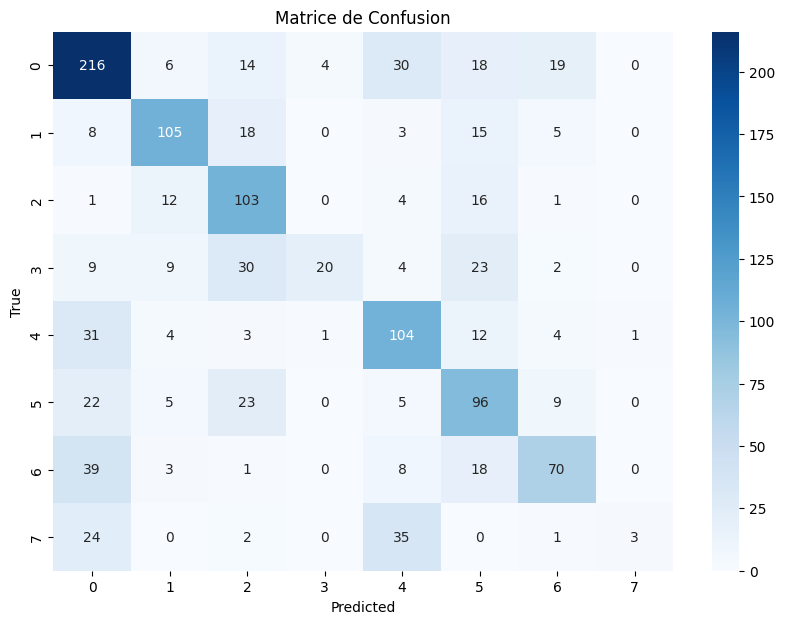

In [10]:
# Matrice de confusion
# La matrice de confusion permet de visualiser les performances du modèle en montrant
# combien de prédictions correctes et incorrectes ont été faites pour chaque classe.
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matrice de Confusion')
plt.show()

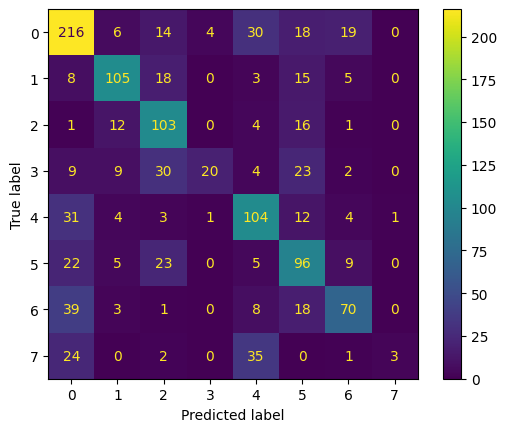

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # ajouter si besoin : display_labels=ordinal_values
disp.plot()
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

ValueError: Mix of label input types (string and number)

In [ ]:
pd.Series(y_test).value_counts()

0_not_relevant                     307
5_science_unreliable               160
4_solutions_harmful_unnecessary    160
1_not_happening                    154
6_proponents_biased                139
2_not_human                        137
3_not_bad                           97
7_fossil_fuels_needed               65
Name: count, dtype: int64